# PRIMA PARTE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

Sono 6485 istanze.

In [5]:
df.isnull().sum()

Shape                    5
Cut                   4303
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4594
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5264
dtype: int64

Sono presenti valori nulli all'interno del dataset.

<Axes: xlabel='Type'>

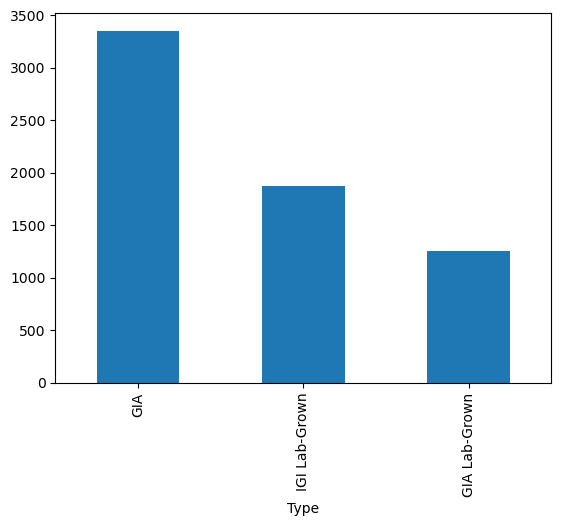

In [6]:
df['Type'].value_counts().plot.bar()

Il dataset è un po' sbilanciato sulla classe da predire

# 1.2

In [4]:
# creare una nuova colonna volume
df_v = df.copy()
df_v['Volume'] = df_v['Length'] * df_v['Width'] * df_v['Height']

In [9]:
df_v[['Volume', 'Length', 'Width', 'Height']].head(n=1)

,Volume,Length,Width,Height
0,225.189035,7.09,6.95,4.57


In [5]:
df_v['Price'] = pd.cut(df_v['Price'], bins=5)

<Axes: xlabel='Price'>

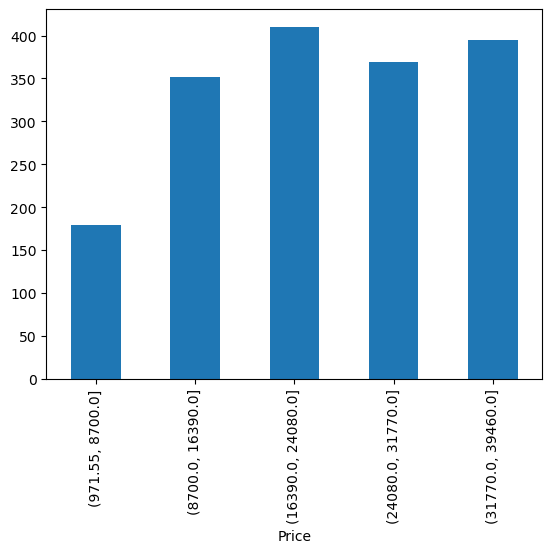

In [18]:
df_v.groupby('Price')['Volume'].mean().plot.bar()

Sull'asse y abbiamo il volume medio in quella fascia di prezzo. Come si può vedere dal grafico, la relazione tra le due feature è debole, il prezzo è influenzato probabilmente da altri fattori (quelli a volume medio più alto sono nella fascia centrale di prezzo)

# 1.3 

In [15]:
df_2 = df[['Carat Weight', 'Price', 'Cut']].dropna()

df_2['Carat Weight'] = pd.cut(df_2['Carat Weight'], bins=5)

pd.pivot_table(df_2, index='Carat Weight', columns= 'Cut', values='Price', aggfunc='mean')


Cut,Astor,Excellent,Ideal,Very Good
Carat Weight,,,,
"(0.997, 1.606]",5348.75,2897.374172,2299.019417,3379.922481
"(1.606, 2.212]",NaN,2495.000000,3803.489933,NaN
"(2.212, 2.818]",NaN,NaN,5288.571429,NaN
"(2.818, 3.424]",NaN,NaN,6523.947368,NaN
"(3.424, 4.03]",NaN,NaN,6917.777778,NaN


Sicuramente aumenta all'aumentare della caratura, e ha un valore medio più alto a parità di caratura, per tagli migliori

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2182 entries, 0 to 6482
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Carat Weight  2182 non-null   category
 1   Price         2182 non-null   int64   
 2   Cut           2182 non-null   object  
dtypes: category(1), int64(1), object(1)
memory usage: 53.5+ KB


# 1.4

In [19]:
df_c = df.copy()
 
# Price per Carat
df_c['PPC'] = df_c['Price'] / df_c['Carat Weight']

In [21]:
df_c[['PPC', 'Price', 'Carat Weight']].head(n=1)

,PPC,Price,Carat Weight
0,1434.782609,2640,1.84


# SECONDA PARTE

In [60]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler #when you have many outliers
from sklearn.preprocessing import LabelEncoder

#classification
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier

#regression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge #least squares
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

#import per la valutazione dei modelli, creazione train test split e cross validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, f1_score, mean_squared_log_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.inspection import permutation_importance

#modelli ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import SelectKBest, RFE

In [85]:
df = pd.read_csv('dataset.csv')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [86]:
df = df.drop(columns=['Cut', 'Fluorescence', 'Culet'])
df = df.dropna()

Elimino unicamente queste tre colonne, sono quelle con più valori nulli e ritenute quindi meno rilevanti. Le altre le tengo

In [55]:
df.head(n=1)

,Shape,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Length,Width,Height,Price,Type
0,Cushion Modified,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,7.09,6.95,4.57,2640,GIA Lab-Grown


In [87]:
le = LabelEncoder()

df['Shape'] = le.fit_transform(df['Shape'])
df['Color'] = le.fit_transform(df['Color'])
df['Clarity'] = le.fit_transform(df['Clarity'])
df['Polish'] = le.fit_transform(df['Polish'])
df['Symmetry'] = le.fit_transform(df['Symmetry'])
df['Girdle'] = le.fit_transform(df['Girdle'])
df['Type'] = le.fit_transform(df['Type'])

In [88]:
y = df['Type']
X = df.drop(columns=['Type'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, stratify=y)

----Decision Tree----
Accuracy during training:1.0
Accuracy during test: 0.9356435643564357
F1 Score: 0.9352480748145309
Confusion Matrix:
[[826   6   5]
 [  6 256  50]
 [  7  30 430]]
----KNeighborsClassifier----
Accuracy during training:0.8551681452444811
Accuracy during test: 0.8298267326732673
F1 Score: 0.8197857240309435
Confusion Matrix:
[[811  19   7]
 [ 77 152  83]
 [ 43  46 378]]
----DummyClassifier----
Accuracy during training:0.5176397771817619
Accuracy during test: 0.5179455445544554
F1 Score: 0.3534614111635379
Confusion Matrix:
[[837   0   0]
 [312   0   0]
 [467   0   0]]


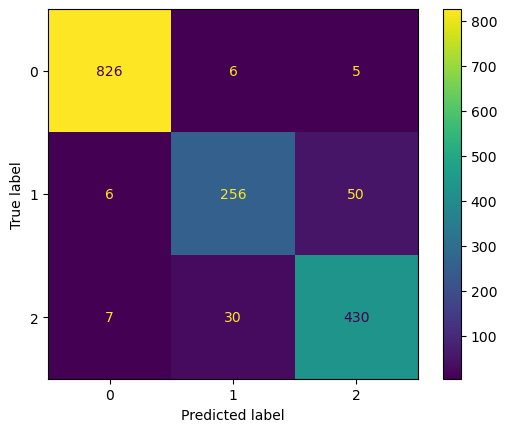

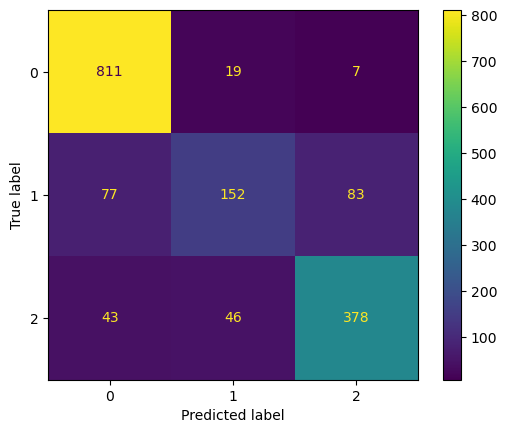

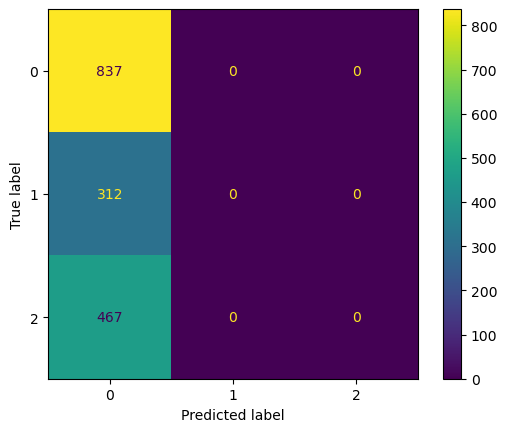

In [58]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DummyClassifier' : DummyClassifier(strategy='most_frequent')
}

def test_model (name, model, traindata, testdata, trainlabels, testlabels):
    
    model.fit(traindata, trainlabels)
    train_pred = model.predict(traindata)
    test_pred = model.predict(testdata)
    print(f"----{name}----")
    print(f"Accuracy during training:{accuracy_score(trainlabels, train_pred)}")
    print(f"Accuracy during test: {accuracy_score(testlabels, test_pred)}")
    print(f"F1 Score: {f1_score(testlabels, test_pred, average='weighted')}")
    print("Confusion Matrix:")
    print(f"{confusion_matrix(testlabels, test_pred)}")
    ConfusionMatrixDisplay(confusion_matrix(testlabels, test_pred)).plot()


for name, model in models.items():
    test_model(name, model, X_train, X_test, y_train, y_test)

Il Decision Tree è il modello con F1 score più alto di quelli trainati.

# 2.2

In [59]:
for name, model in models.items():
  result = cross_val_score(model, X, y, cv=10, scoring='accuracy')
  print(f"-----{name}-----")
  print(f"Media {result.mean()}")
  print(result)

-----Decision Tree-----
Media 0.930218297357176
[0.93508501 0.92426584 0.93044822 0.92260062 0.91176471 0.93343653
 0.94117647 0.9380805  0.93498452 0.93034056]
-----KNeighborsClassifier-----
Media 0.8217526952210965
[0.81761978 0.83153014 0.82843895 0.82198142 0.7879257  0.83126935
 0.8374613  0.80804954 0.81888545 0.83436533]
-----DummyClassifier-----
Media 0.5177162038654233
[0.51777434 0.51777434 0.51777434 0.51702786 0.51702786 0.51702786
 0.51702786 0.51857585 0.51857585 0.51857585]


I valori sono simili a quelli ottenuti nel punto precedente. Lieve miglioramento per Dummy e KN

# 2.3

In [74]:
model = KNeighborsClassifier().fit(X_train, y_train)

model.score(X_test, y_test)

r = permutation_importance(model, X, y, n_repeats=5, random_state=0)

for i in r.importances_mean.argsort()[0:2]:
    print(f"{df.columns[i]}")

Length/Width Ratio
Height


Queste sono le due feature più importanti

# 2.4

In [77]:
parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3, 5, 10, 15]
}

model = KNeighborsClassifier()

gs_clf = GridSearchCV(model, parameters, cv=10, n_jobs=-1)
gs_clf.fit(X_train, y_train)
gs_clf.best_params_
print(gs_clf.best_score_)
print(gs_clf.best_params_)

model.set_params(**gs_clf.best_params_)
model.fit(X_train, y_train)

score = f1_score(y_test, model.predict(X_test), average='weighted')
print('F1 Score on test:', score)

0.8207199454715857
{'n_neighbors': 5, 'weights': 'distance'}
F1 Score on test: 0.8257989176380691


Il valore di F1 score cambia leggermente

# 2.5

In [89]:

transformer = ColumnTransformer(transformers=[('disc', KBinsDiscretizer(n_bins=5), ['Length', 'Width', 'Height']),
                                              ('std', MinMaxScaler(), ['Price'])], 
                                              remainder='passthrough')

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('model', model)
])

pipeline.fit(X_train, y_train)

print(f"Accuracy score: {accuracy_score(y_test, pipeline.predict(X_test))}")

Accuracy score: 0.8539603960396039


L'accuracy score sta lentamente crescendo

# 2.6

In [104]:
df = pd.read_csv('dataset.csv')
df = df.drop(columns=['Cut', 'Fluorescence', 'Culet'])
df = df.dropna()

In [ ]:
transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Shape', 'Color','Clarity', 'Polish', 'Symmetry', 'Girdle', 'Type'])],
                                              remainder='passthrough')

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('simp', SimpleImputer()),
    ('std', StandardScaler()),
    ('model', model)
])

pipeline.fit(X_train, y_train)

print(f"Accuracy score: {accuracy_score(y_test, pipeline.predict(X_test))}")

ValueError: A given column is not a column of the dataframe

# 2.7

In [ ]:
transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), ['Shape', 'Color','Clarity', 'Polish', 'Symmetry', 'Girdle', 'Type'])],
                                              remainder='passthrough')

model = KNeighborsClassifier(n_neighbors=5, weights='distance')

pipeline = Pipeline(steps=[
    ('transformer', transformer),
    ('simp', StandardScaler()),
    ('std', SimpleImputer()),
    ('svd', TruncatedSVD()),
    ('model', model)
])

param_grid = {
    'svd__n_components': [2, 4, 6]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy)